# Lab 5

Authors: $\lambda$ Justin Ventura [[jventura3@gulls.salisbury.edu]] & Blaine Mason $\lambda$

Date: Thursday, October 15th, 2020.

## - Description -

A lot of stats :(

In [4]:
# Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import the data set:
iris = pd.read_csv('iris.data', names=['sep_length', 'sep_width', 'pet_length', 'pet_width', 'class'])
print('iris dataset shape: ', iris.shape)
iris.head(10)

iris dataset shape:  (150, 5)


,sep_length,sep_width,pet_length,pet_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## For each of the four numerical categories, compute the mean with a 95% confidence interval and show them in a bar chart.

No handles with labels found to put in legend.
(5.616466910467366, 6.070199756199301, 5.843333333333334, 'sepal_lens')
(2.940939044954326, 3.1670609550456748, 3.0540000000000003, 'sepal_wids')
(3.2196647052447807, 4.297668628088552, 3.758666666666666, 'petal_lens')
(0.9936240603625135, 1.40370927297082, 1.1986666666666668, 'petal_wids')


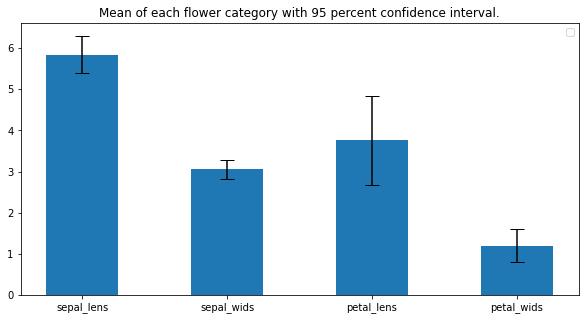

In [5]:
sepal_lens = iris[['sep_length']].to_numpy()
sepal_wids = iris[['sep_width']].to_numpy()
petal_lens = iris[['pet_length']].to_numpy()
petal_wids = iris[['pet_width']].to_numpy()

all_arrays = [sepal_lens, sepal_wids, petal_lens, petal_wids]
names = ['sepal_lens', 'sepal_wids', 'petal_lens', 'petal_wids']
mean_data = []


# 1) take 50 samples WITH replacement.
# 2) take the average of those, append to a list L.
# 3) repeat 50 times.
# 4) find the standard deviation of L, this is SE.
for name, array in zip(names, all_arrays):
    sample_size = 50
    resample_count = 50
    x_bar = array.mean()
    samples = []
    sample_means = []

    for i in range(resample_count):
        for i in range(sample_size):
            idx = np.random.randint(0, 150)
            samples.append(array[idx])
        sample_means.append(np.mean(samples))
        samples.clear()

    SE = np.std(sample_means)
    lo = (x_bar - 1.96 * SE)
    hi = (x_bar + 1.96 * SE)

    mean_data.append((lo, hi, x_bar, name))

# For information.
for data in mean_data:
    print(data)

# Plotting
plt.rcParams['figure.figsize'] = [10, 5]
plt.title('Mean of each flower category with 95 percent confidence interval.')
plt.bar(names, [data[2] for data in mean_data], yerr=[data[1] - data[0] for data in mean_data], capsize=7, width=0.5)
plt.show()
pass

## Next, compute the mean of sepal and petal measurements with 95% confidence intervals, but this time separated by each of the three classes (so you will have a total of 12 bars and intervals).

No handles with labels found to put in legend.
(4.951372637502438, 5.060627362497561, 5.005999999999999, 'setosa')
(5.865800209212847, 6.006199790787153, 5.936, 'versicolor')
(6.4967456330469595, 6.679254366953037, 6.587999999999998, 'virginica')
(3.3569207140002444, 3.479079285999757, 3.4180000000000006, 'setosa')
(2.7255166351992126, 2.8144833648007883, 2.7700000000000005, 'versicolor')
(2.9260937988414857, 3.021906201158514, 2.9739999999999998, 'virginica')
(1.4448712032955546, 1.4831287967044453, 1.464, 'setosa')
(4.2032916888264165, 4.316708311173583, 4.26, 'versicolor')
(5.47847683906251, 5.625523160937489, 5.552, 'virginica')
(0.22603968247942138, 0.2619603175205784, 0.2439999999999999, 'setosa')
(1.2973574583362437, 1.354642541663756, 1.3259999999999998, 'versicolor')
(1.9875815800762184, 2.064418419923781, 2.026, 'virginica')


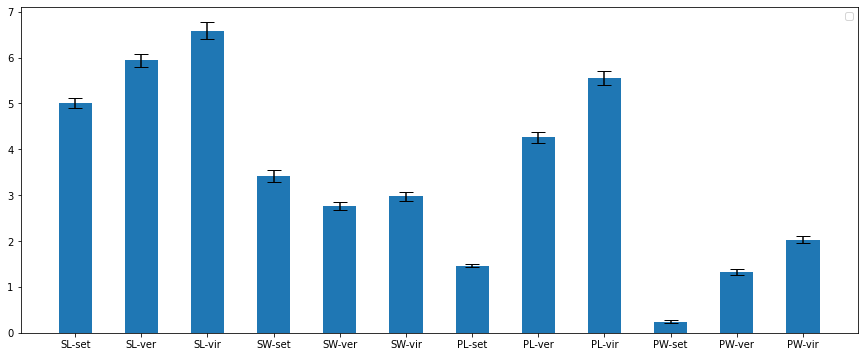

In [8]:
sepal_lens = iris[['sep_length', 'class']].to_numpy()
sepal_wids = iris[['sep_width', 'class']].to_numpy()
petal_lens = iris[['pet_length', 'class']].to_numpy()
petal_wids = iris[['pet_width', 'class']].to_numpy()
all_arrays = [sepal_lens, sepal_wids, petal_lens, petal_wids]

# This makes indexing easier; convert to numbers.
for array in all_arrays:
    for elem in array:
        if elem[1] == 'Iris-setosa':
            elem[1] = int(0)
        elif elem[1] == 'Iris-versicolor':
            elem[1] = int(1)
        else:
            elem[1] = int(2)

# Split arrays by len, wid, and flower (iris) type.
new_arrays = []
mean_data = []
for array in all_arrays:
    new_arrays.append(np.split(array, np.where(np.diff(sepal_lens[:,1]))[0]+1))

# Sampling happens here.
for group in new_arrays:
    f_names = ['setosa', 'versicolor', 'virginica']
    for f_class, f_name in zip(group, f_names):
        sample_size = 50
        resample_count = 50
        x_bar = f_class[:,0].mean()
        samples = []
        sample_means = []

        for i in range(resample_count):
            for i in range(sample_size):
                #idx = np.random.randint(0, 150)
                idx = np.random.randint(0, len(f_class))
                samples.append(f_class[idx])
            sample_means.append(np.mean(samples))
            samples.clear()

        SE = np.std(sample_means)
        lo = (x_bar - 1.96 * SE)
        hi = (x_bar + 1.96 * SE)

        mean_data.append((lo, hi, x_bar, f_name))

# For information.
for data in mean_data:
    print(data)

# Plotting
plt.rcParams['figure.figsize'] = [15, 6]
names2 = ['SL-set', 'SL-ver', 'SL-vir', 'SW-set', 'SW-ver', 'SW-vir', 'PL-set', 'PL-ver', 'PL-vir', 'PW-set', 'PW-ver', 'PW-vir']
plt.bar(names2, [data[2] for data in mean_data], yerr=[data[1] - data[0] for data in mean_data], capsize=7, width=0.5)
plt.show()
pass